In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter

In [5]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [6]:
data_dir = Path('input')
trn_file = data_dir / 'train.csv'
seed = 42

In [7]:
ls - alF "input"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1C5E-4469

 C:\Users\user\Dankook_Dacon_AI 디렉터리


 C:\Users\user\Dankook_Dacon_AI 디렉터리


 C:\Users\user\Dankook_Dacon_AI\input 디렉터리

2020-09-16  오후 09:01    <DIR>          .
2020-09-16  오후 09:01    <DIR>          ..
2020-09-09  오후 10:01       132,988,145 feature.csv
2020-09-09  오후 09:13           800,010 sample_submission.csv
2020-09-09  오후 09:13        18,936,246 test.csv
2020-09-09  오후 09:13        76,278,443 train.csv
               4개 파일         229,002,844 바이트
               2개 디렉터리  44,000,190,464 바이트 남음


파일을 찾을 수 없습니다.


In [8]:
df = pd.read_csv(trn_file, index_col=0)
print(df.shape)
df.head()

(320000, 19)


u        g        r        i        z    redshift  dered_u  dered_g  \
id                                                                              
0   23.2640  20.3368  19.0095  17.6724  16.9396 -8.1086e-05  23.1243  20.2578   
1   15.0521  14.0620  13.4524  13.2684  13.1689  4.5061e-03  14.9664  14.0045   
2   16.7864  15.8254  15.5363  15.3935  15.3500  4.7198e-04  16.6076  15.6866   
3   25.6606  21.1887  20.2212  19.8949  19.6346  5.8143e-06  25.3536  20.9947   
4   24.4534  20.6992  19.0424  18.3242  17.9826 -3.3247e-05  23.7714  20.4338   

    dered_r  dered_i  dered_z  nObserve  nDetect  airmass_u  airmass_g  \
id                                                                       
0   18.9551  17.6321  16.9089        18       18     1.1898     1.1907   
1   13.4114  13.2363  13.1347         1        1     1.2533     1.2578   
2   15.4400  15.3217  15.2961         2        2     1.0225     1.0241   
3   20.0873  19.7947  19.5552         4        3     1.2054     1.2061   
4   18.8630  18.1903  17.8759        13       12     1.1939     1.1943   

    airmass_r  airmass_i  airmass_z  class  
id                                          
0      1.1890     1.1894     1.1902      0  
1      1.2488     1.2510     1.2555      1  
2      1.0210     1.0217     1.0233      0  
3      1.2049     1.2051     1.2057      0  
4      1.1937     1.1938     1.1941      0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

In [31]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

In [30]:
target_col = 'u'
pred_col = 'dered_u'
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z', 'class']


<AxesSubplot:>

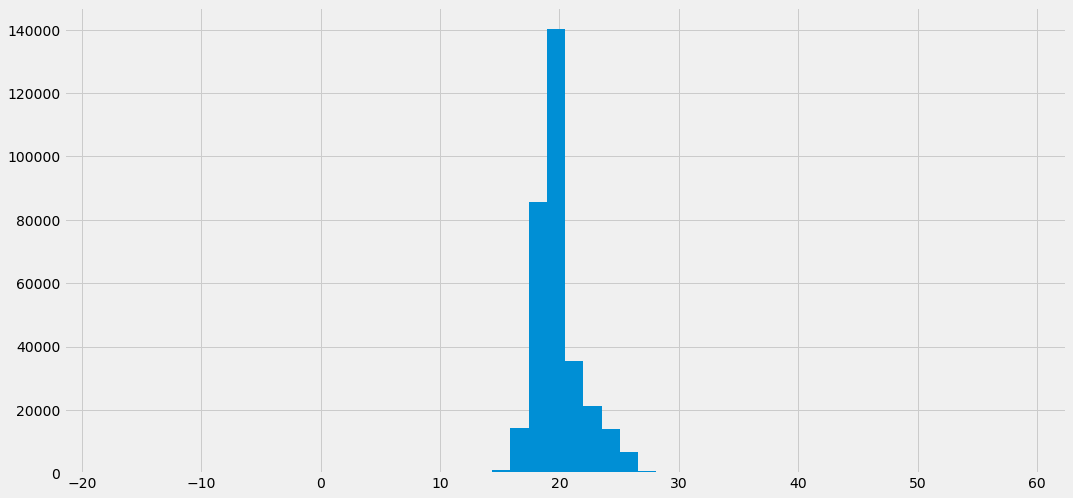

In [17]:
df.u.hist(bins=50)

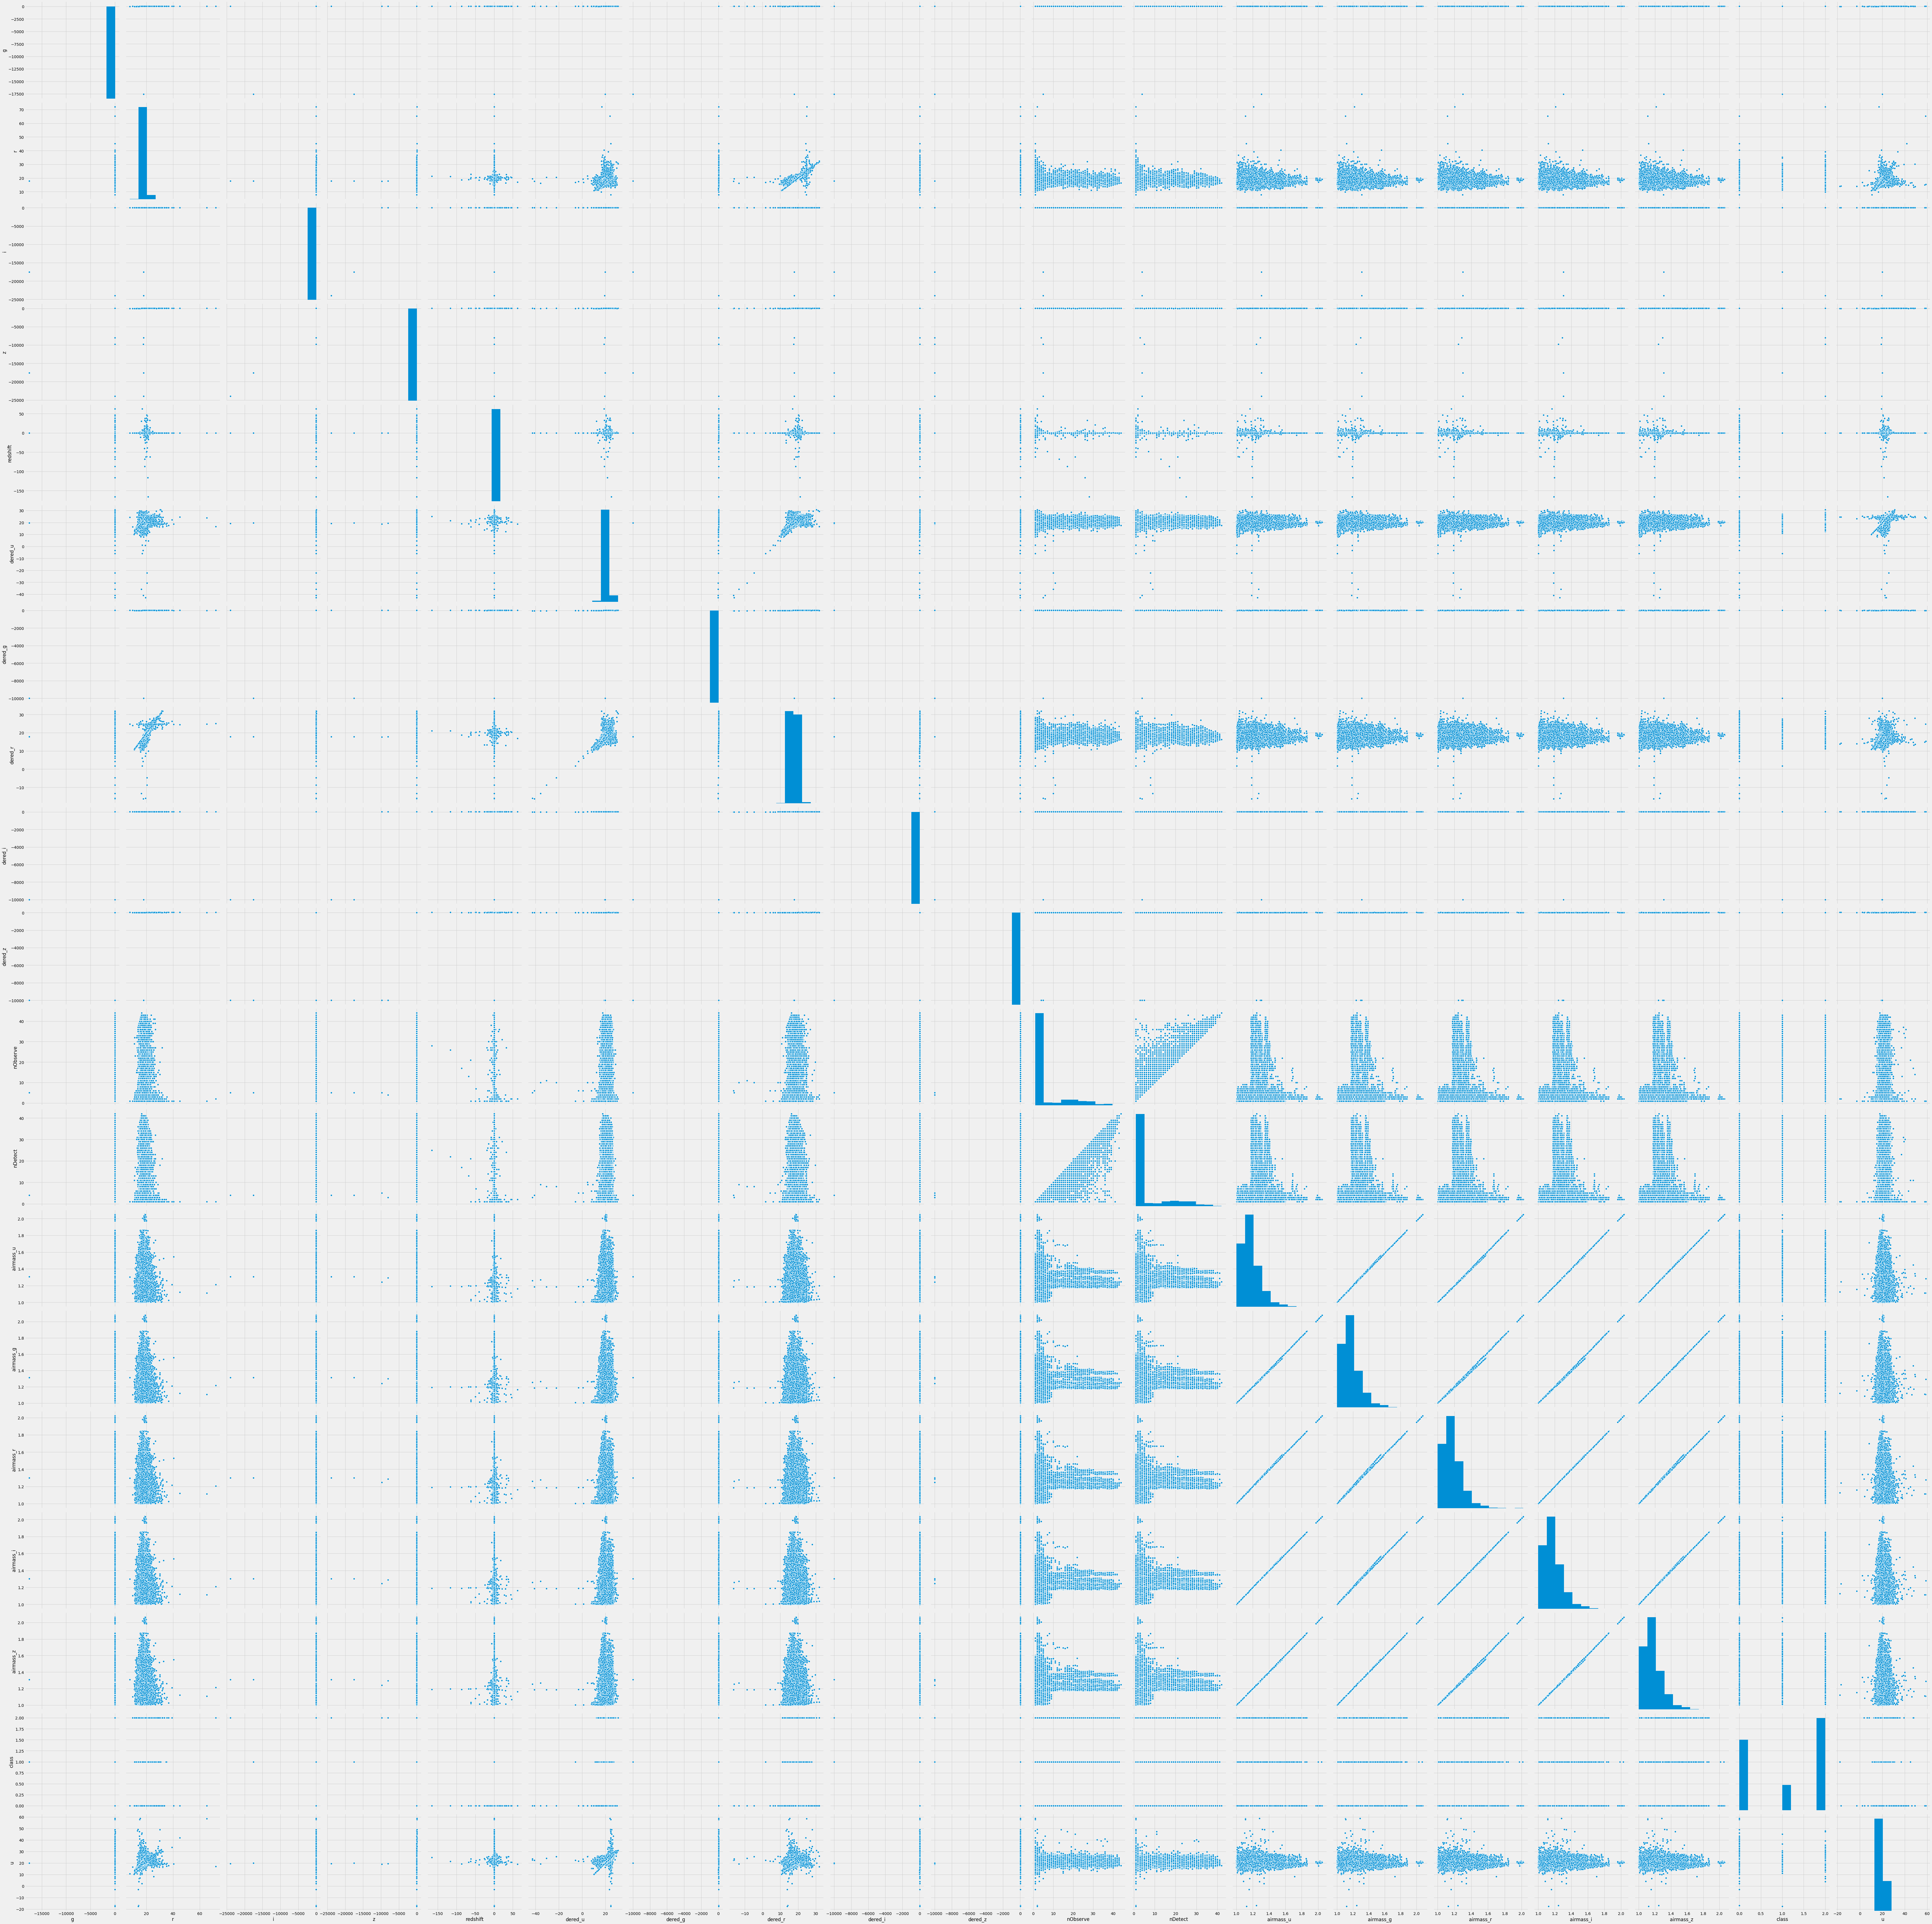

In [19]:
sns.pairplot(data=df, vars=num_cols + [target_col], size=5)

In [20]:
df.corr().style.background_gradient()

In [21]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y, p))
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y), np.log1p(p)))

In [22]:
lr = LinearRegression()
lr.fit(df[num_cols], df[target_col])
df[pred_col] = lr.predict(df[num_cols])

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        0.39


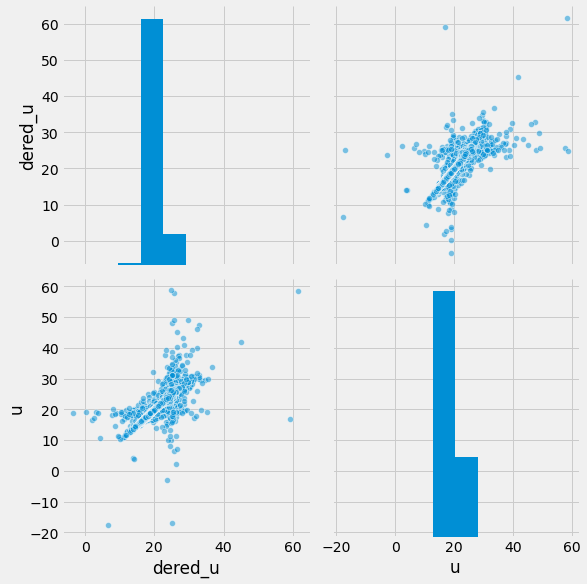

In [23]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})

<AxesSubplot:>

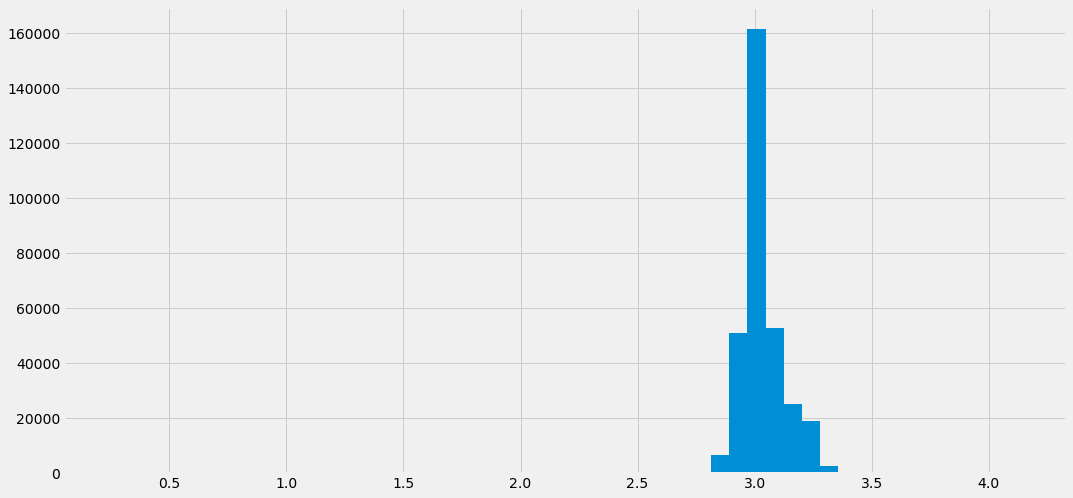

In [50]:
df.dered_u.apply(np.log1p).hist(bins=50)

In [33]:
df[num_cols].describe()

g            r            i            z    redshift  \
count  320000.0000  320000.0000  320000.0000  320000.0000  3.2000e+05   
mean       18.3768      17.7358      17.1742      16.8752  5.8308e-02   
std        31.1108       1.4662      52.5615      57.1463  5.7546e-01   
min    -17555.3656       7.7314  -23955.8178  -23955.8178 -1.6605e+02   
25%        17.4749      16.8772      16.5239      16.2889  3.5580e-05   
50%        18.1405      17.5258      17.1497      16.9176  4.7129e-02   
75%        19.0732      18.4281      18.0074      17.7289  9.4597e-02   
max        46.3383      72.0097      50.1641      52.6127  6.2323e+01   

           dered_u      dered_g      dered_r      dered_i      dered_z  \
count  320000.0000  320000.0000  320000.0000  320000.0000  320000.0000   
mean       19.8524      18.2271      17.6154      17.1523      16.8693   
std         1.9070      17.7866       1.4730      25.0758      35.4365   
min        -3.3722   -9999.0000     -16.3802   -9999.0000   -9999.0000   
25%        18.7415      17.3484      16.7871      16.4530      16.2341   
50%        19.4208      18.0224      17.4434      17.0874      16.8694   
75%        20.4183      18.8884      18.2911      17.9070      17.6557   
max        61.5662      30.6132      31.9572      32.0162      30.7813   

          nObserve      nDetect    airmass_u    airmass_g    airmass_r  \
count  320000.0000  320000.0000  320000.0000  320000.0000  320000.0000   
mean        6.3327       6.1388       1.1758       1.1765       1.1751   
std         8.8811       8.5516       0.1163       0.1181       0.1147   
min         1.0000       1.0000       1.0001       1.0000       1.0002   
25%         1.0000       1.0000       1.0882       1.0884       1.0878   
50%         2.0000       2.0000       1.1793       1.1792       1.1794   
75%         5.0000       5.0000       1.2275       1.2260       1.2292   
max        44.0000      42.0000       2.0508       2.0803       2.0221   

         airmass_i    airmass_z        class  
count  320000.0000  320000.0000  320000.0000  
mean        1.1754       1.1761       1.1163  
std         0.1155       0.1172       0.9235  
min         1.0001       1.0000       0.0000  
25%         1.0880       1.0883       0.0000  
50%         1.1794       1.1793       1.0000  
75%         1.2286       1.2268       2.0000  
max         2.0363       2.0654       2.0000